# Pymaceuticals Inc.
---

### Analysis

Major take away I got was how extremely high P-value of 0.9999999999999923 confirms that the positive association between weight and tumor volume is highly significant and unlikely to be due to chance. These findings suggest that as the weight of the mice increases, the average tumor volume also increases. Additionally, the Capomulin drug regimen significantly reduces tumor volume on average compared to other drug regimens.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')


# Display the data table for preview
mouse_study_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = mouse_study_combined_df['Mouse ID'].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_id = mouse_study_combined_df.loc[mouse_study_combined_df.duplicated(subset=['Mouse ID', 'Timepoint',], keep=False)]
# Display results
duplicate_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_id_df = mouse_study_combined_df.loc[mouse_study_combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Display results
duplicate_mice_id_df

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_combined_df[mouse_study_combined_df["Mouse ID"].isin(duplicate_mice_id_df)==False]

# Display results
mouse_study_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = mouse_study_clean_df['Mouse ID'].nunique()

total_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_mean = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drug_regimen_median = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drug_regimen_variance = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
drug_regimen_std = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drug_regimen_sem = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

summary_table_df = pd.DataFrame({
    "Mean Tumor Volume": drug_regimen_mean, 
     "Median Tumor Volume": drug_regimen_median, 
     "Tumor Volume Variance": drug_regimen_variance, 
     "Tumor Volume Std. Dev.": drug_regimen_std, 
     "Tumor Volume Std. Err.": drug_regimen_sem})

summary_table_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
single_group_by = mouse_study_clean_df.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_single_line = single_group_by['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

summary_table_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

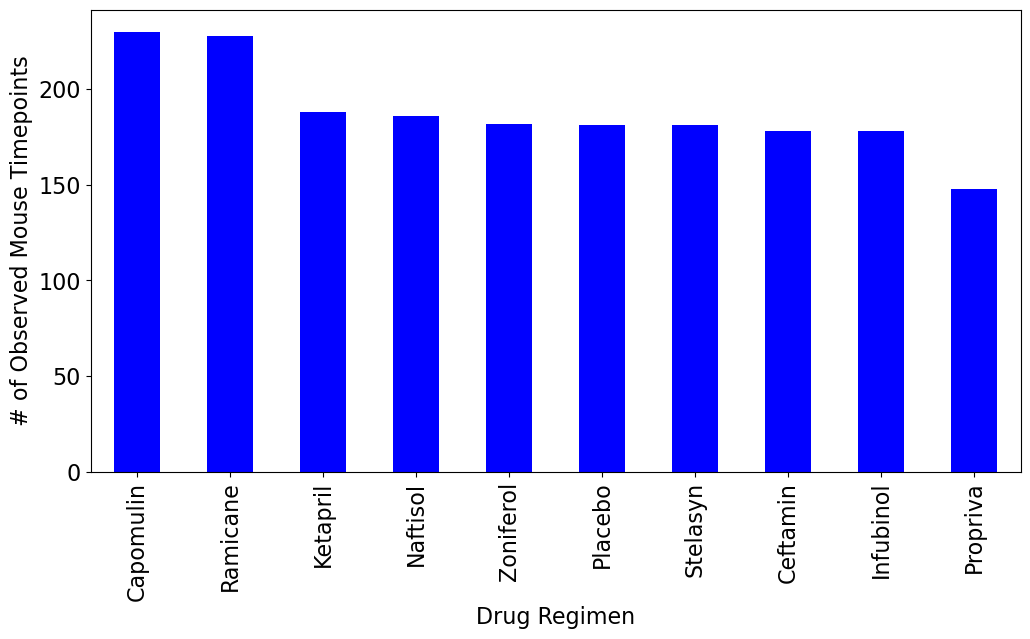

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_timepoints_drugs = mouse_study_clean_df.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending=False)

bar_plot_pandas = bar_timepoints_drugs.plot.bar(rot=90, fontsize=16, figsize=(12,6), color='blue')

plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=16)

Text(0, 0.5, '# of Observed Mouse Timepoints')

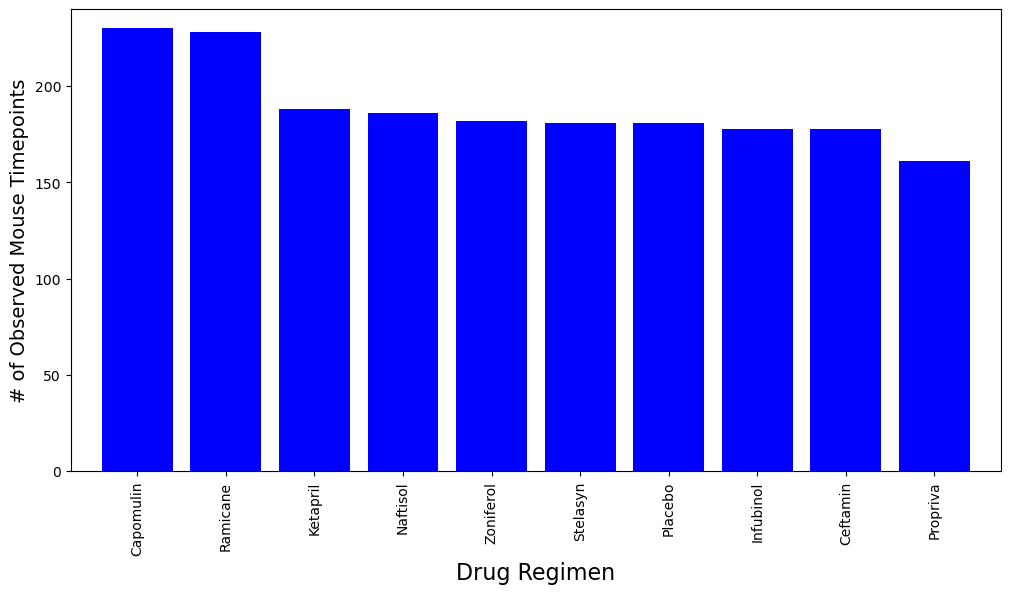

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_list =(mouse_study_combined_df.groupby(["Drug Regimen"])["Timepoint"].count()).sort_values(ascending=False)
timepoints_list

x_axis = np.arange(len(bar_timepoints_drugs))
fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.bar(x_axis,timepoints_list, color='blue')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn',
                            'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(timepoints_list)+10)

plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("# of Observed Mouse Timepoints",fontsize = 14)

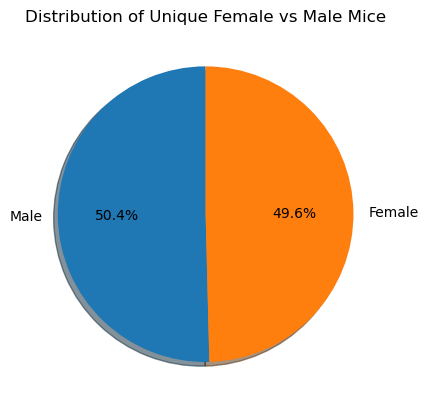

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = mouse_study_clean_df.drop_duplicates(subset=['Mouse ID'])

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('')  
plt.show()

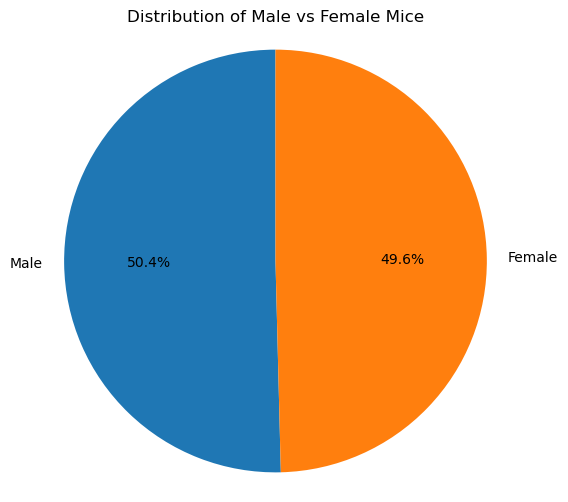

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = mouse_study_clean_df.drop_duplicates(subset=['Mouse ID'])

gender_distribution = unique_mice['Sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Male vs Female Mice')

plt.axis('equal')



# Make the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = mouse_study_clean_df.groupby('Mouse ID').max()['Timepoint'].reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(last_timepoint_df, mouse_study_clean_df, on=['Mouse ID', 'Timepoint'])





In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through each treatment to calculate IQR and determine potential outliers
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_vols = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_data.append(drug_tumor_vols)

    # Calculate the IQR
    quartiles = drug_tumor_vols.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_tumor_vols[(drug_tumor_vols < lower_bound) | (drug_tumor_vols > upper_bound)]
    
    print(f'{drug} treatment:')
    print(f'Lower bound: {lower_bound}')
    print(f'Upper bound: {upper_bound}')
    print(f'Potential outliers: {outliers}\n')

Capomulin treatment:
Lower bound: 20.70456164999999
Upper bound: 51.83201549
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane treatment:
Lower bound: 17.912664470000003
Upper bound: 54.30681135
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol treatment:
Lower bound: 36.83290494999999
Upper bound: 82.74144559000001
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin treatment:
Lower bound: 25.355449580000002
Upper bound: 87.66645829999999
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



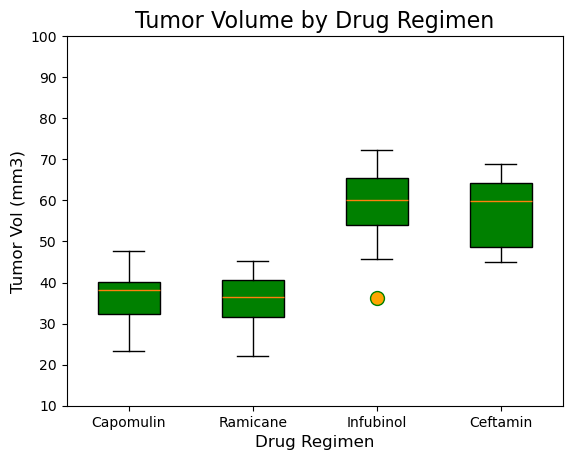

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Show outliers on boxplot for visibility
outlier_design = dict(marker="o", markerfacecolor="orange", markersize=10, markeredgecolor="green")

# Create Boxplot
plt.boxplot(tumor_vol_data, widths=0.5, patch_artist=True, boxprops=dict(facecolor="green"), flierprops=outlier_design)
plt.title('Tumor Volume by Drug Regimen', fontsize= 16)
plt.xlabel('Drug Regimen', fontsize=12) 
plt.ylabel('Tumor Vol (mm3)', fontsize=12)

plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
#plt.xlim(-0.95, len(x_axis)+2)
plt.ylim(10, 100)

plt.show()

## Line and Scatter Plots

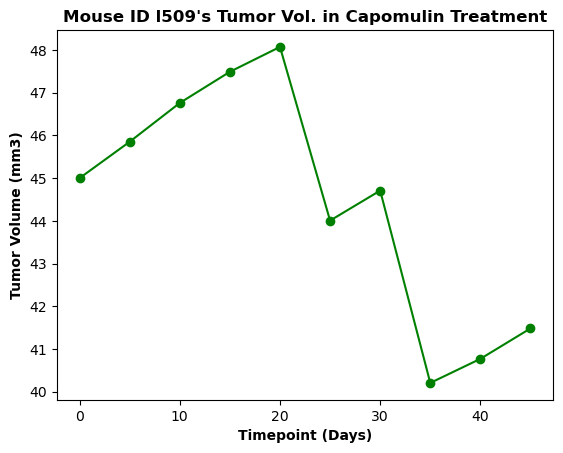

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = mouse_study_combined_df.loc[mouse_study_combined_df["Drug Regimen"] == "Capomulin",:]


# Identify specific mouse ID and get data of the mouse id
mouse_id = 'l509'
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]


# Generate a line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o', color='Green')

# Set x/y label, title
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

# Present the box plot chart
plt.show()

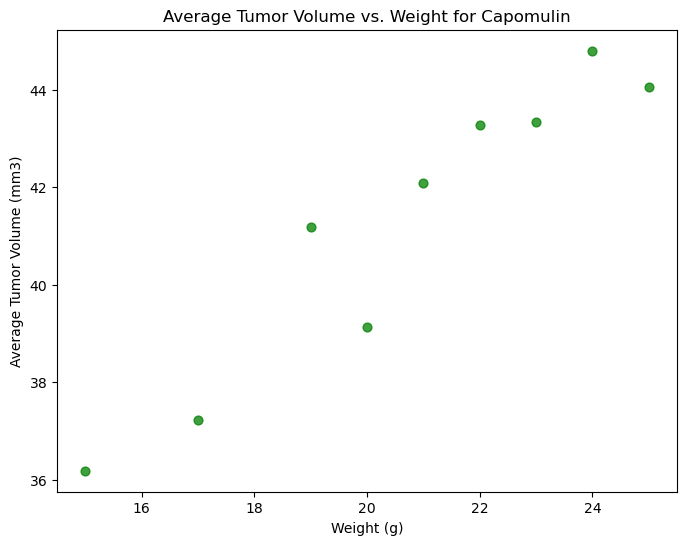

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate average tumor volume per weight group
avg_wgt_tum_vol_cap = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# Create the scatter plot
# Set figure size
plt.figure(figsize=(8, 6)) 

# Customize plot
plt.scatter(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, s=40, c='green', alpha=0.75)  

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight for Capomulin')

# Display the plot
plt.show()

avg_wgt_tum_df = pd.DataFrame(avg_wgt_tum_vol_cap)

# Dispay Dataframe
avg_wgt_tum_df

# Rese the index of the dataframe
new_index_avg_wgt_df = avg_wgt_tum_df.reset_index()

# Display new index dataframe
new_index_avg_wgt_df

## Correlation and Regression

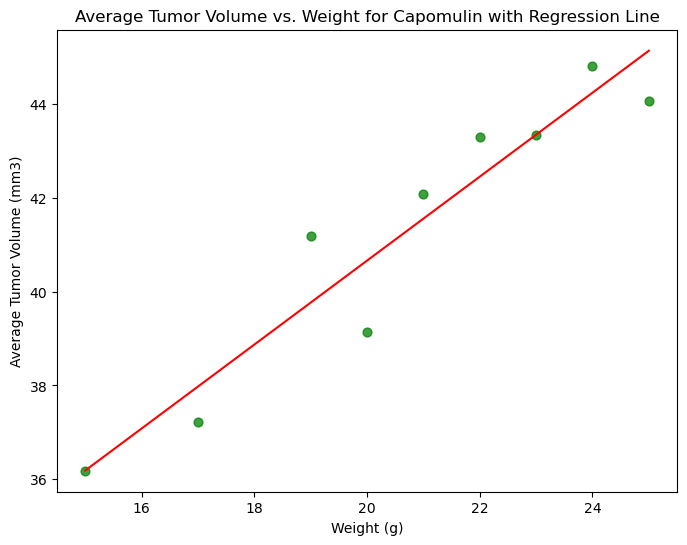

Slope (m): 0.8947726097340617
Y-intercept (b): 22.76422998359192
Standard error of the estimate (SE): 1.0249929158261613
R-squared: 0.9034966277438602
P-value: 0.9999999999999923
Linear Equation: y = 0.8947726097340617(X) + 22.76422998359192


In [28]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the linear regression line
m, b = np.polyfit(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, 1)

# Create the scatter plot
plt.figure(figsize=(8, 6)) 

# Customize plot
plt.scatter(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, s=40, c='green', alpha=0.75)
plt.plot(avg_wgt_tum_vol_cap.index, m * avg_wgt_tum_vol_cap.index + b, color='red')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight for Capomulin with Regression Line')

# Display the plot
plt.show()

# Calculate residuals
residuals = new_index_avg_wgt_df['Tumor Volume (mm3)'] - (m * new_index_avg_wgt_df['Weight (g)'] + b)

# Calculate standard error of the estimate (SSE)
sse = np.sum(residuals**2)

# Calculate degrees of freedom
df_freedom = len(new_index_avg_wgt_df) - 2  # 2 for slope and intercept

# Calculate mean squared error (MSE)
mse = sse / df_freedom

# Calculate standard error of the estimate (SE)
se = np.sqrt(mse)

# Calculate r-squared
r_squared = 1 - (sse / np.sum((new_index_avg_wgt_df['Tumor Volume (mm3)'] - new_index_avg_wgt_df['Tumor Volume (mm3)'].mean())**2))

# Calculate p-value
from scipy import stats
t_stat, p_value = stats.ttest_rel(new_index_avg_wgt_df['Tumor Volume (mm3)'], (m * new_index_avg_wgt_df['Weight (g)'] + b))

# Print results
print(f"Slope (m): {m}")
print(f"Y-intercept (b): {b}")
print(f"Standard error of the estimate (SE): {se}")
print(f"R-squared: {r_squared}")
print(f"P-value: {p_value}")
print(f"Linear Equation: y = {m}(X) + {b}")